# Image Classification

##### using the CIFAR-10 dataset

In [32]:
import tensorflow as tf
import random
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [27]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [52]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

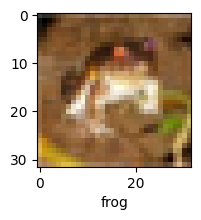

In [17]:
plot_sample(X_train, y_train, 0)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4967 - accuracy: 0.4614
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1416 - accuracy: 0.5989
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0050 - accuracy: 0.6491
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9098 - accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8390 - accuracy: 0.7086
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7861 - accuracy: 0.7263
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7351 - accuracy: 0.7439
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6947 - accuracy: 0.7568
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6572 - accuracy: 0.7694
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.621

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9250 - accuracy: 0.6977


[0.9250317215919495, 0.697700023651123]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.98305211e-04, 1.00108728e-05, 2.78895698e-03, 9.39355791e-01,
        1.87091500e-04, 5.09532802e-02, 6.72112583e-05, 7.84395597e-05,
        5.79682505e-03, 4.64095268e-04],
       [3.74865012e-05, 6.25098407e-01, 7.34614923e-06, 2.96449753e-06,
        1.15825412e-06, 1.61649645e-08, 3.51813014e-07, 1.09616760e-08,
        3.74793559e-01, 5.87580143e-05],
       [2.05508862e-02, 3.23088281e-02, 2.99335155e-03, 1.41919148e-03,
        1.15093763e-03, 1.61334901e-04, 9.19302867e-04, 2.38217734e-04,
        9.38699067e-01, 1.55892363e-03],
       [7.46216714e-01, 1.21967122e-02, 1.91183779e-02, 7.53390193e-02,
        2.17396840e-02, 7.65351404e-04, 8.60668933e-06, 1.80087462e-02,
        1.06422246e-01, 1.84566074e-04],
       [8.24710412e-07, 3.08796484e-06, 2.08539162e-02, 1.16327889e-02,
        7.54105330e-01, 6.51613157e-03, 2.06864804e-01, 2.05570741e-05,
        2.49172604e-06, 1.17220623e-07]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

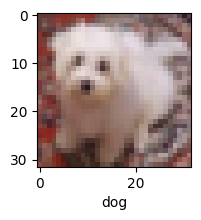

In [53]:
index = random.randint(0, len(y_test))
plot_sample(X_test, y_test, index)